<a href="https://colab.research.google.com/github/YumYumKarma/MachineLearning-Tensorflow-/blob/main/SimpleConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

creating a CNN to classify CIFAR images using keras sequential API.

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

loading dataset - using CIFAR10 datset (60,000 color images in 10 classes , 6000 images in each class) , mutually exclusive dtatset , training images - 50000, test images - 50000

In [9]:
(train_images, train_labels), (test_images,test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0 , test_images/255.0

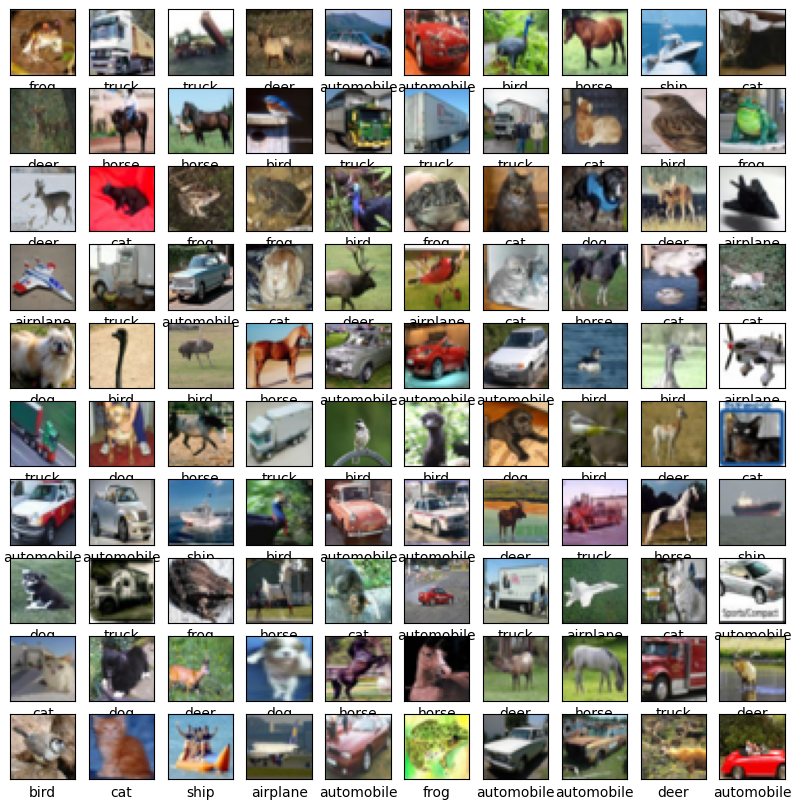

In [26]:
# specifying class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#displaying few items of dataset with their labels
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Creating a convolutional base

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Compiling and Training the model

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5182 - accuracy: 0.4452 - val_loss: 1.2635 - val_accuracy: 0.5458
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1619 - accuracy: 0.5878 - val_loss: 1.1292 - val_accuracy: 0.6039
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0191 - accuracy: 0.6423 - val_loss: 1.0602 - val_accuracy: 0.6279
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9215 - accuracy: 0.6771 - val_loss: 0.9584 - val_accuracy: 0.6627
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8565 - accuracy: 0.7000 - val_loss: 0.9391 - val_accuracy: 0.6794
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7926 - accuracy: 0.7218 - val_loss: 0.8817 - val_accuracy: 0.6976
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7459 - accuracy: 0.7395 - val_loss: 0.9021 -

Model Evaluation

313/313 - 3s - loss: 0.8860 - accuracy: 0.7071 - 3s/epoch - 11ms/step


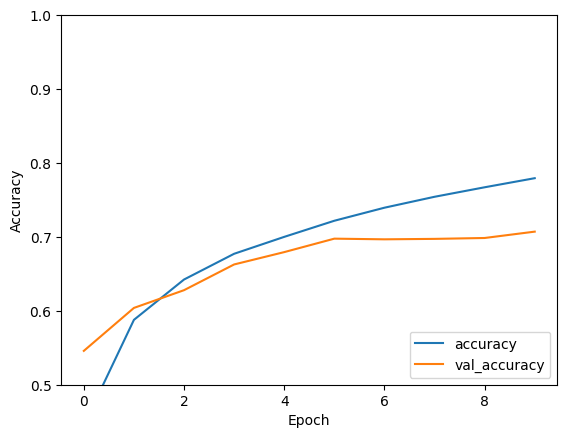

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

In [34]:
print(test_acc)

0.707099974155426
